In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
iris = datasets.load_iris()

In [4]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [5]:
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Silhouette Analysis :   silhouette score = p-q /max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

    The value of the silhouette score range lies between -1 to 1.

    A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [10]:
from sklearn.metrics import silhouette_score
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.681046169211746
For n_clusters=3, the silhouette score is 0.5528190123564091
For n_clusters=4, the silhouette score is 0.4980505049972866
For n_clusters=5, the silhouette score is 0.4887488870931048
For n_clusters=6, the silhouette score is 0.3648340039670018
For n_clusters=7, the silhouette score is 0.3453151648784163
For n_clusters=8, the silhouette score is 0.35974549238457515


In [4]:
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(n_clusters=3)

In [5]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [6]:
print(model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'K Mean Clustering')

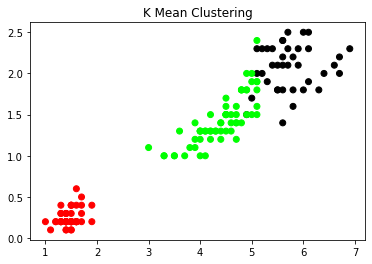

In [8]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_])
plt.title('K Mean Clustering')

### Since we have the original class lables, lets check how accurate the KMeans is doing.

In [12]:
predict = model.predict(x)

In [13]:
Y = iris.target

In [14]:
from scipy.stats import mode
labels = np.zeros_like(predict)
for i in range(3):
    mask = (predict==i)
    labels[mask] = mode(Y[mask])[0]

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y, labels)

0.8933333333333333

In [16]:
confusion_matrix(Y, labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

### Hierarchical clustering

In [17]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [18]:
# different ways to compute distance between two clusters

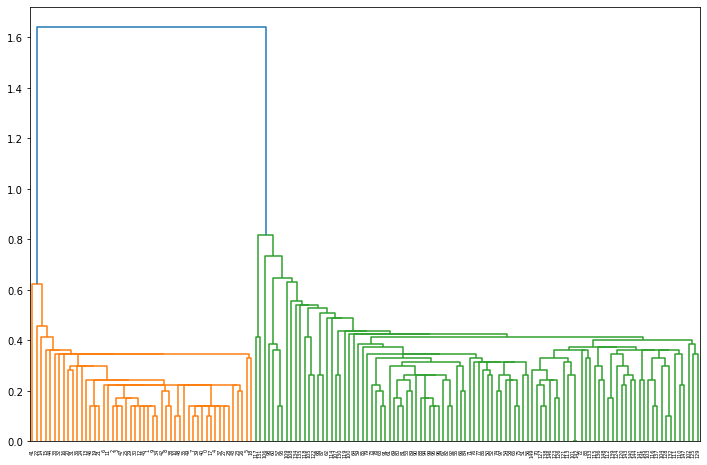

In [19]:
# single linkage
plt.figure(figsize = (12,8))
mergings = linkage(x, method = "single" , metric = "euclidean")
dendrogram(mergings)
plt.show()

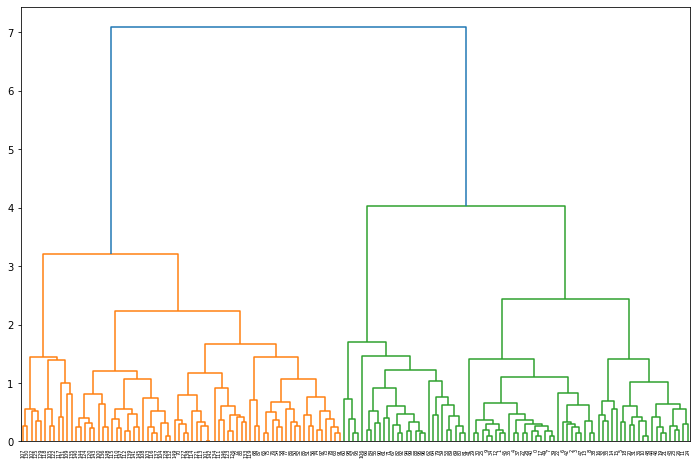

In [20]:
# Complete Linkage

plt.figure(figsize=(12, 8))
mergings = linkage(x, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [21]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
    

In [22]:
# 3 clusters
lables = cut_tree(mergings, n_clusters=3).reshape(-1, )
lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Agglomerative Clustering')

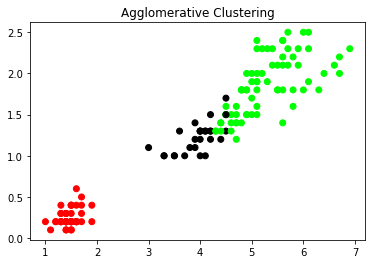

In [23]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 # Plot the Original Classifications
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[lables])
plt.title('Agglomerative Clustering')